In [18]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
import numpy as np

%matplotlib notebook

Traceback (most recent call last):
  File "/home/maciek/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/home/maciek/.local/lib/python3.6/site-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [27]:
data = pd.read_csv('/tmp/dddd', sep=" ", header=None)
data.columns = ["Label", "ID", "x1Label", "x1", "x2Label", "x2", "FitnessLabel", "Fitness", "EnergyLabel", "Energy"]

In [28]:
data = data.drop(["x1Label", "EnergyLabel", "x2Label", "FitnessLabel"], axis=1)

In [29]:
data.head(12)

,Label,ID,x1,x2,Fitness,Energy
0,Agent,[0],624.062702,366.412823,10776.0,40.0
1,Agent,[1],153.084650,381.441328,60879.0,40.0
2,Agent,[2],830.154267,245.301028,-34055.0,40.0
3,Agent,[3],671.314576,159.741569,-35283.0,40.0
4,-,NaN,NaN,NaN,NaN,NaN
5,Agent,[1],153.084650,381.441328,60879.0,60.0
6,Agent,[2],830.154267,245.301028,-34055.0,20.0
7,Agent,[3],671.314576,159.741569,-35283.0,20.0
8,Agent,[0],624.062702,366.412823,10776.0,60.0
9,-,NaN,NaN,NaN,NaN,NaN


In [30]:
best_solution = pd.DataFrame(columns=["iteration", "maxValue"])

iteration = 0
max_val = -float('inf')
x1 = None
x2 = None
for index, row in data.iterrows():
    if row["Label"] == "-":
        best_solution = best_solution.append({"iteration": iteration, 
                                            "maxValue": max_val,
                                            "x1": x1,
                                            "x2": x2}, ignore_index=True)
        max_val = -float('inf')
        iteration += 1
    else:
        if row["Fitness"] > max_val:
            max_val = row["Fitness"]
            x1 = row["x1"]
            x2 = row["x2"]
            

NO_OF_ITERATIONS = len(best_solution)

In [31]:
best_solution

,iteration,maxValue,x1,x2
0,0.0,60879.0,1.530847e+02,3.814413e+02
1,1.0,60879.0,1.530847e+02,3.814413e+02
2,2.0,60879.0,1.530847e+02,3.814413e+02
3,3.0,9104116.0,-4.390117e+03,4.332602e+04
4,4.0,9104116.0,-4.390117e+03,4.332602e+04
...,...,...,...,...
906,906.0,891082510.0,-1.532412e+06,3.689207e+06
907,907.0,892245340.0,-1.539638e+06,3.691408e+06
908,908.0,892245340.0,-1.539638e+06,3.691408e+06
909,909.0,892245340.0,-1.539638e+06,3.691408e+06


<IPython.core.display.Javascript object>


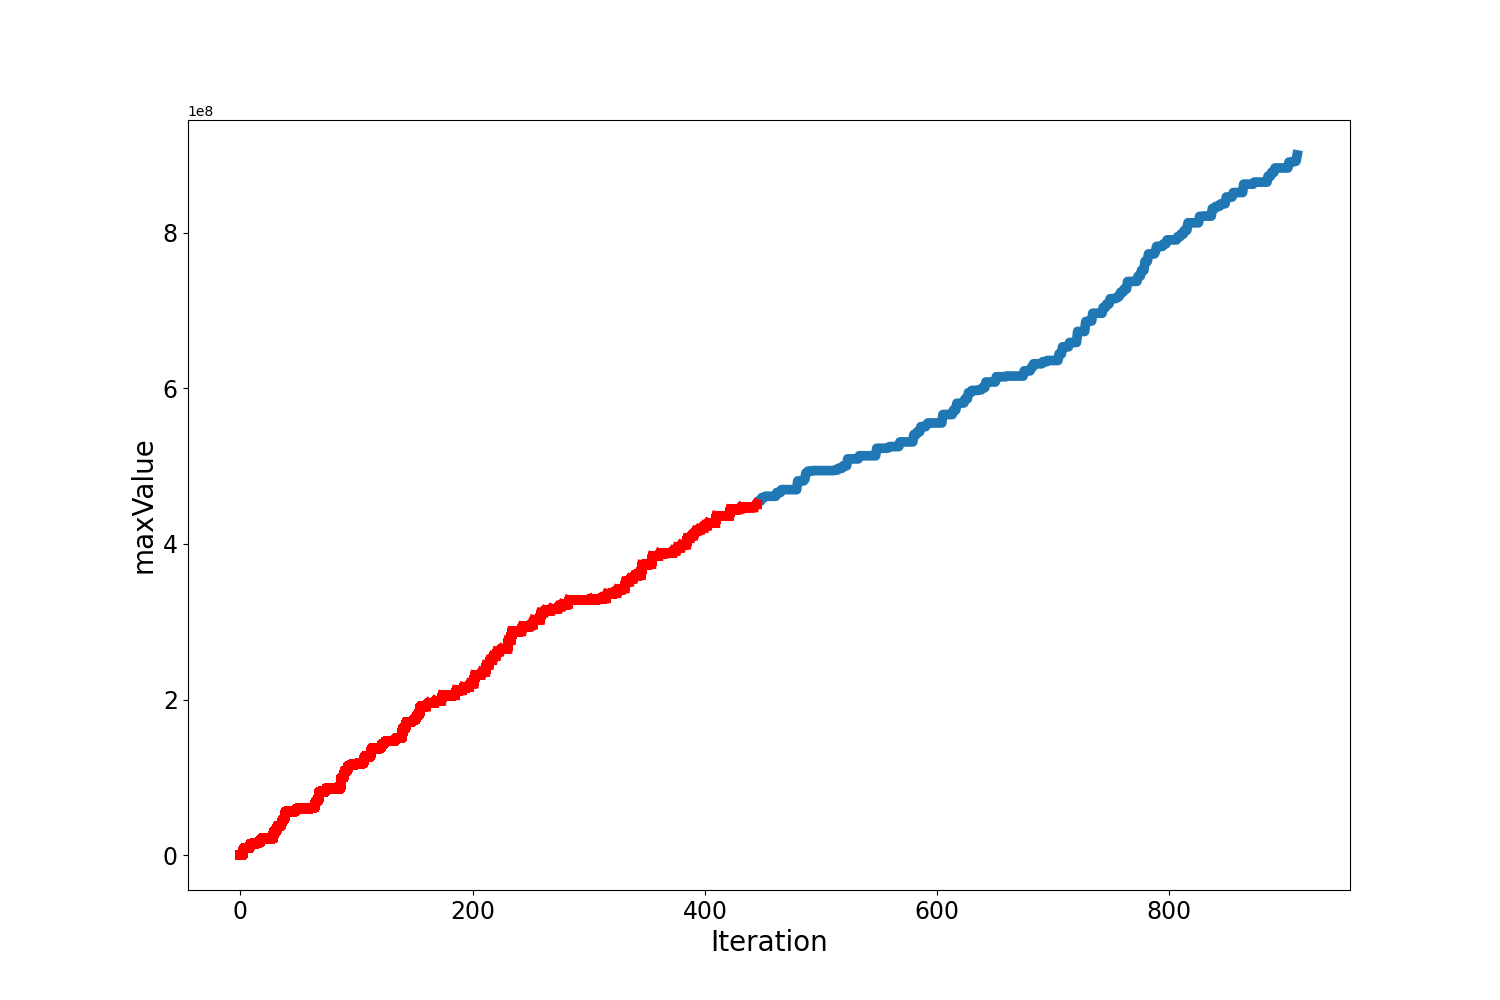

In [32]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Iteration',fontsize=20)
plt.ylabel('Fitness',fontsize=20)

plt.plot(best_solution["iteration"], best_solution["maxValue"])

<IPython.core.display.Javascript object>


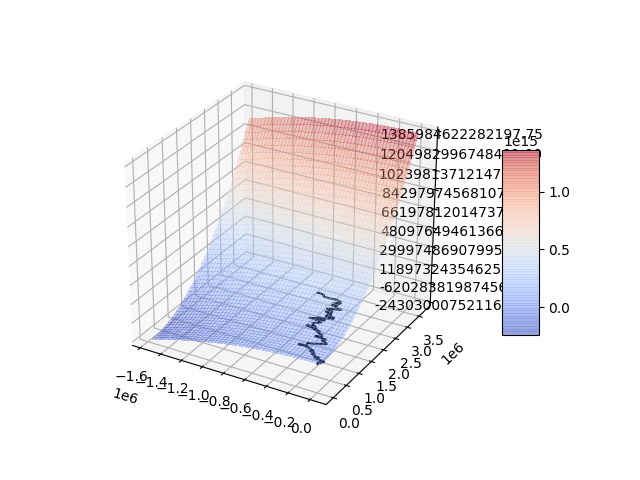

In [37]:
def update(num, data, line):
    line.set_color('black')
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
    
fig = plt.figure("Rosenbrock optimization")
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(np.min(best_solution["x1"]), np.max(best_solution["x1"]), 500)
Y = np.arange(np.min(best_solution["x2"]), np.max(best_solution["x2"]), 500)
X, Y = np.meshgrid(X, Y)
# Z = -(X**2 + Y**2) # DEJONG 1
Z = 0 - (100 * ((X - Y**2) + (1 - X)**2)) # Rosenbrock - DEJONG 2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False, alpha=0.3)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

data = np.array([best_solution["x1"].to_numpy(),
                 best_solution["x2"].to_numpy(),
                 best_solution["maxValue"].to_numpy()])
N = data.shape[1]
# N = 5
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

ani = matplotlib.animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
ani.save('SolutionRosenbrock.mp4', writer=writer)